**Business Problem**
- The data shown here simulates a medical in which mice infected with a virus were given 
various doses of two medicines and then checked 2 weeks later to see if they were still infected

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\mouse_viral_study.csv')
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df['Virus Present'].value_counts()

Virus Present
0    200
1    200
Name: count, dtype: int64

**EDA**

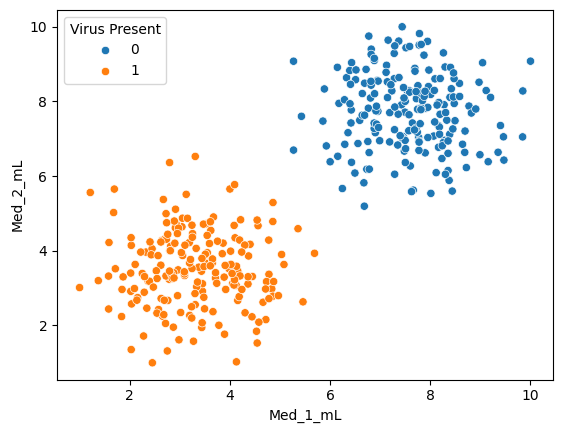

In [10]:
sns.scatterplot(x = 'Med_1_mL',y='Med_2_mL',hue = 'Virus Present',data = df)
plt.show()

In [11]:
x = df[['Med_1_mL','Med_2_mL']]
y = df['Virus Present']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8 ,random_state = 9)

**Hyperparameter Tunning**

In [22]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
estimator = SVC()

param_grid= {'C':[0.001,0.01,0.1,1,10,100,1000],'kernel':['linear','rbf','sigmoid','poly']}

grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')

grid.fit(x_train,y_train)

grid.best_params_

{'C': 0.001, 'kernel': 'linear'}

**Support Vector Machine(SVM)**

 - with default parameters

In [16]:
# modelling 
from sklearn.svm import SVC
svm_default_model = SVC()
svm_default_model.fit(x_train,y_train)

# predictions 
ypred_train = svm_default_model.predict(x_train)
ypred_test = svm_default_model.predict(x_test)

# evaluation 
from sklearn.metrics import accuracy_score
print('Test Accuracy:',accuracy_score(y_test,ypred_test))
print('Train Accuracy:',accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_default_model,x,y,cv = 5)
print('Cross validataion score:',scores.mean())

Test Accuracy: 1.0
Train Accuracy: 1.0
Cross validataion score: 1.0


**SVM model with best parameters**

In [30]:
# Modelling 
svm_best_model = SVC(kernel = 'linear',C = 0.01)
svm_best_model.fit(x_train,y_train)

#Evaluation on train data 
ypred_train = svm_best_model.predict(x_train)

from sklearn.metrics import accuracy_score
print('Train Accuracy:',accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print('cross validation score:',cross_val_score(svm_best_model,x_train,y_train,cv = 5).mean())

# Evaluation on test data 
ypred_test = svm_best_model.predict(x_test)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 1.0
cross validation score: 1.0
Test Accuracy: 1.0


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[38,  0],
       [ 0, 42]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

